In [1]:
import os                           # for testing use only
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [2]:
shein_df = pd.read_csv('shein_df_final.csv')

In [3]:
shein_df.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,rating,price,category,...,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,4.91,39.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,4.90,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,4.89,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",4.94,119.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,4.94,49.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
shein_df.shape

(4425, 23)

In [5]:
shein_df.dtypes

Color                 object
Style                 object
Pattern Type          object
Type                  object
Fabric                object
Material              object
Care Instructions     object
rating               float64
price                float64
category              object
Polyester            float64
Elastane             float64
Viscose              float64
Spandex              float64
Cotton               float64
Metallized Fibres    float64
Polyamide            float64
Rayon                float64
Silk                 float64
Nylon                float64
Cashmere             float64
Linen                float64
Polyurethane         float64
dtype: object

## Preprecessing

In [6]:
X = shein_df.drop('price',axis=1)
y = shein_df['price']

In [7]:
numeric_features = X.select_dtypes(['float64'])
categorical_features = X.select_dtypes(['object'])

In [8]:
numeric_features.head()

,rating,Polyester,Elastane,Viscose,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,4.91,96.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.90,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.89,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.94,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.94,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
categorical_features.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,category
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,dresses
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,dresses
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,dresses
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",dresses
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,dresses


In [10]:
encoder = OneHotEncoder()
encoded_categorical = pd.DataFrame(encoder.fit_transform(categorical_features).toarray(),columns = encoder.get_feature_names(categorical_features.columns))

/Users/mayshviro/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# for col in shein_df.columns:
#     if shein_df[col].dtype=='object':
#         shein_df[col] = shein_df[col].astype('category')

In [12]:
categorical_features.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,category
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,dresses
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,dresses
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,dresses
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",dresses
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,dresses


In [13]:
# for col in categorical_features.columns:
#     encoder = LabelEncoder()
#     shein_df[col] = encoder.fit_transform(shein_df[col])

In [14]:
shein_df.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,rating,price,category,...,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,4.91,39.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,4.90,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,4.89,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",4.94,119.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,4.94,49.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# X = shein_df.drop('price',axis=1)
# y = shein_df['price']

In [16]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
encoded_categorical.head()

,Color_Apricot,Color_Army Green,Color_Baby Blue,Color_Baby Pink,Color_Beige,Color_Black,Color_Black and White,Color_Blue,Color_Blue and White,Color_Brown,...,Material_Woven Fabric,Care Instructions_Do not wash,Care Instructions_Hand wash or professional dry clean,"Care Instructions_Hand wash,do not dry clean",Care Instructions_Machine wash or professional dry clean,"Care Instructions_Machine wash, do not dry clean","Care Instructions_Machine wash, do not dry clean,wash with the soft detergent",category_dresses,category_pants,category_shirts
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [18]:
X_encoded = pd.concat([numeric_features,encoded_categorical],axis=1)

In [19]:
X_encoded.shape

(4425, 275)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape

(3540, 275)

In [22]:
y_train.shape

(3540,)

In [185]:
#regr = RandomForestRegressor(n_estimators=200,random_state=0)
#regr.fit(X_train, y_train)

In [186]:
#mean_squared_error(y_train, regr.predict(X_train)) # train

In [187]:
#mean_absolute_error(y_train, regr.predict(X_train)) #train

In [188]:
#r2_score(y_train, regr.predict(X_train)) #train

In [189]:
#mean_absolute_error(y_test, regr.predict(X_test)) #test

In [190]:
#r2_score(y_test, regr.predict(X_test))

<AxesSubplot:>

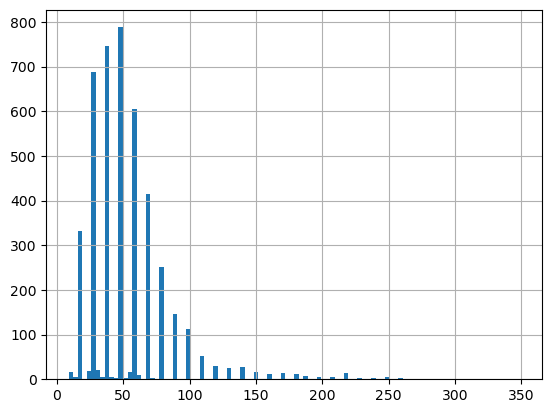

In [191]:
shein_df.price.hist(bins=100)

## Linear regression

In [30]:
X_train.head()

,rating,Polyester,Elastane,Viscose,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,...,Material_Woven Fabric,Care Instructions_Do not wash,Care Instructions_Hand wash or professional dry clean,"Care Instructions_Hand wash,do not dry clean",Care Instructions_Machine wash or professional dry clean,"Care Instructions_Machine wash, do not dry clean","Care Instructions_Machine wash, do not dry clean,wash with the soft detergent",category_dresses,category_pants,category_shirts
4411,5.00,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3717,4.93,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
564,4.94,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1788,0.00,65.0,0.0,30.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3902,5.00,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [31]:
pca = PCA(n_components=200)
X_train_new = pca.fit_transform(X_train)

In [32]:
X_test_new = pca.transform(X_test)

In [33]:
# X_train_new[:3]

In [34]:
regr = LinearRegression()
regr.fit(X_train_new, y_train)

LinearRegression()

In [35]:
mean_squared_error(y_train, regr.predict(X_train_new))

521.513453193797

In [36]:
mean_absolute_error(y_train, regr.predict(X_train_new))

15.291154832790749

In [37]:
r2_score(y_train, regr.predict(X_train_new)) #train

0.4726385790935719

In [38]:
mean_absolute_error(y_test, regr.predict(X_test_new)) #test

15.318167043272847

In [39]:
r2_score(y_test, regr.predict(X_test_new))

0.4900276768068822

## KNN

In [40]:
regr = KNeighborsRegressor(n_neighbors=10)
regr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [41]:
mean_absolute_error(y_train, regr.predict(X_train))

13.983199435028249

In [42]:
r2_score(y_train, regr.predict(X_train)) 

0.5281909768379083

In [43]:
mean_absolute_error(y_test, regr.predict(X_test))

15.430981920903955

In [44]:
r2_score(y_test, regr.predict(X_test))

0.4830423608223813

## SVR

In [45]:
regr = SVR(kernel='linear')
regr.fit(X_train, y_train)

SVR(kernel='linear')

In [46]:
r2_score(y_train, regr.predict(X_train)) 

0.37005166384314847

In [47]:
mean_absolute_error(y_train, regr.predict(X_train))

14.448743171915766

In [48]:
mean_absolute_error(y_test, regr.predict(X_test))

14.9374028708913

In [49]:
r2_score(y_test, regr.predict(X_test))

0.37875954629091924

## Gradient Boosting regression

In [50]:
regr = GradientBoostingRegressor(n_estimators=200,random_state=0)
regr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=200, random_state=0)

In [51]:
r2_score(y_train, regr.predict(X_train)) 

0.6591897316090879

In [52]:
mean_absolute_error(y_train, regr.predict(X_train))

12.562293211599792

In [53]:
mean_absolute_error(y_test, regr.predict(X_test))

14.149314329348968

In [54]:
r2_score(y_test, regr.predict(X_test))

0.5906386291082869

## RandomForest Regression

In [176]:
regr = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=8)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [177]:
r2_score(y_train, regr.predict(X_train)) 

0.7611164514129841

In [178]:
mean_absolute_error(y_train, regr.predict(X_train))

11.171942397607134

In [179]:
r2_score(y_test, regr.predict(X_test))

0.6222643158060933

In [180]:
mean_absolute_error(y_test, regr.predict(X_test))

13.708060736593769

In [182]:
y_pred = regr.predict(X_test)

In [183]:
y_test[:10] #True labels

1257    69.0
2572    49.0
3741    69.0
1068    39.0
1732    59.0
287     39.0
4139    99.0
1844    29.0
3928    49.0
1056    49.0
Name: price, dtype: float64

In [184]:
y_pred[:10]

array([69.62750494, 37.38638584, 58.0807341 , 82.94275516, 54.07942908,
       54.95907842, 59.35424404, 53.33071202, 47.42429176, 62.00412037])

In [135]:
shein_df.shape

(4425, 23)

In [137]:
shein_df.head()

,Color,Style,Pattern Type,Type,Fabric,Material,Care Instructions,rating,price,category,...,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,Nylon,Cashmere,Linen,Polyurethane
0,Light Grey,Elegant,Plain,Bodycon,Slight Stretch,Fabric,Hand wash or professional dry clean,4.91,39.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Mint Green,Boho,"Plants, All Over Print",Shirt,Non-Stretch,Fabric,Machine wash or professional dry clean,4.90,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,White,Boho,Floral,A Line,Slight Stretch,Woven Fabric,Machine wash or professional dry clean,4.89,79.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black,Elegant,Plain,A Line,Non-Stretch,Fabric,"Hand wash,do not dry clean",4.94,119.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Black,Elegant,Plain,Bodycon,Slight Stretch,Flannelette,Machine wash or professional dry clean,4.94,49.0,dresses,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
X_encoded.head()

,rating,Polyester,Elastane,Viscose,Spandex,Cotton,Metallized Fibres,Polyamide,Rayon,Silk,...,Material_Woven Fabric,Care Instructions_Do not wash,Care Instructions_Hand wash or professional dry clean,"Care Instructions_Hand wash,do not dry clean",Care Instructions_Machine wash or professional dry clean,"Care Instructions_Machine wash, do not dry clean","Care Instructions_Machine wash, do not dry clean,wash with the soft detergent",category_dresses,category_pants,category_shirts
0,4.91,96.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,4.90,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,4.89,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,4.94,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.94,95.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## Principal component analysis

In [140]:
from sklearn.decomposition import PCA

In [198]:
pca = PCA(n_components=30)
X_encoded_pca = pca.fit_transform(X_encoded)

In [199]:
X_encoded_pca.shape

(4425, 30)

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_pca, y, test_size=0.2, random_state=42)

In [201]:
regr = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=8)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [202]:
r2_score(y_train, regr.predict(X_train)) 

0.7616033808613474

In [203]:
r2_score(y_test, regr.predict(X_test))

0.6231312666374627

In [214]:
pca = PCA(n_components=25)
X_encoded_pca = pca.fit_transform(X_encoded)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded_pca, y, test_size=0.2, random_state=42)

In [216]:
regr = RandomForestRegressor(n_estimators=100,random_state=0,max_depth=8)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, random_state=0)

In [217]:
r2_score(y_train, regr.predict(X_train)) 

0.7474779531401541

In [218]:
r2_score(y_test, regr.predict(X_test))

0.5846173541482216